In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

In [2]:
df = pd.read_csv('cars.csv')

df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
categorical_cols = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique features")
    print(df[col].unique())
    print()

Brand: 11 унікальних значень
['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']

Model: 58 унікальних значень
['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']

Fuel_Type: 2 унікальних значень
['Petrol' 'Diesel']

Transmission: 2 унікальних значень
['Manual' 'Automatic']

Owner_Type: 3 унікальних значень
['First' 'Second' 'Third']



Numerical columns: Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price, Car_ID — 8

Categorical columns: Brand, Model, Fuel_Type, Transmission, Owner_Type — 5

Among the categorical:

- 2 binary: Fuel_Type, Transmission

- 2 multi-categorical: Brand, Model

- 1 ordinal: Owner_Type (First, Second, Third)

In [5]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

X_train.shape, X_test.shape

((80, 12), (20, 12))

In [6]:
# taking the most frequent category as 1

fuel_order = X_train['Fuel_Type'].value_counts().index
fuel_map = {fuel_order[0]: 1, fuel_order[1]: 0}
X_train['Fuel_Type_Code'] = X_train['Fuel_Type'].map(fuel_map)
X_test['Fuel_Type_Code'] = X_test['Fuel_Type'].map(fuel_map)

In [7]:
trans_order = X_train['Transmission'].value_counts().index
trans_map = {trans_order[0]: 1, trans_order[1]: 0}
X_train['Transmission_Code'] = X_train['Transmission'].map(trans_map)
X_test['Transmission_Code'] = X_test['Transmission'].map(trans_map)

In [8]:
ohe = OneHotEncoder(sparse=False, drop=None)
ohe.fit(X_train[['Brand']])

brand_columns = list(ohe.categories_[0])

brand_train = pd.DataFrame(ohe.transform(X_train[['Brand']]), 
                            columns=brand_columns, 
                            index=X_train.index)
brand_test = pd.DataFrame(ohe.transform(X_test[['Brand']]), 
                           columns=brand_columns, 
                           index=X_test.index)

X_train = pd.concat([X_train.reset_index(drop=True), brand_train.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), brand_test.reset_index(drop=True)], axis=1)

/Users/sofiapetrova/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [11]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

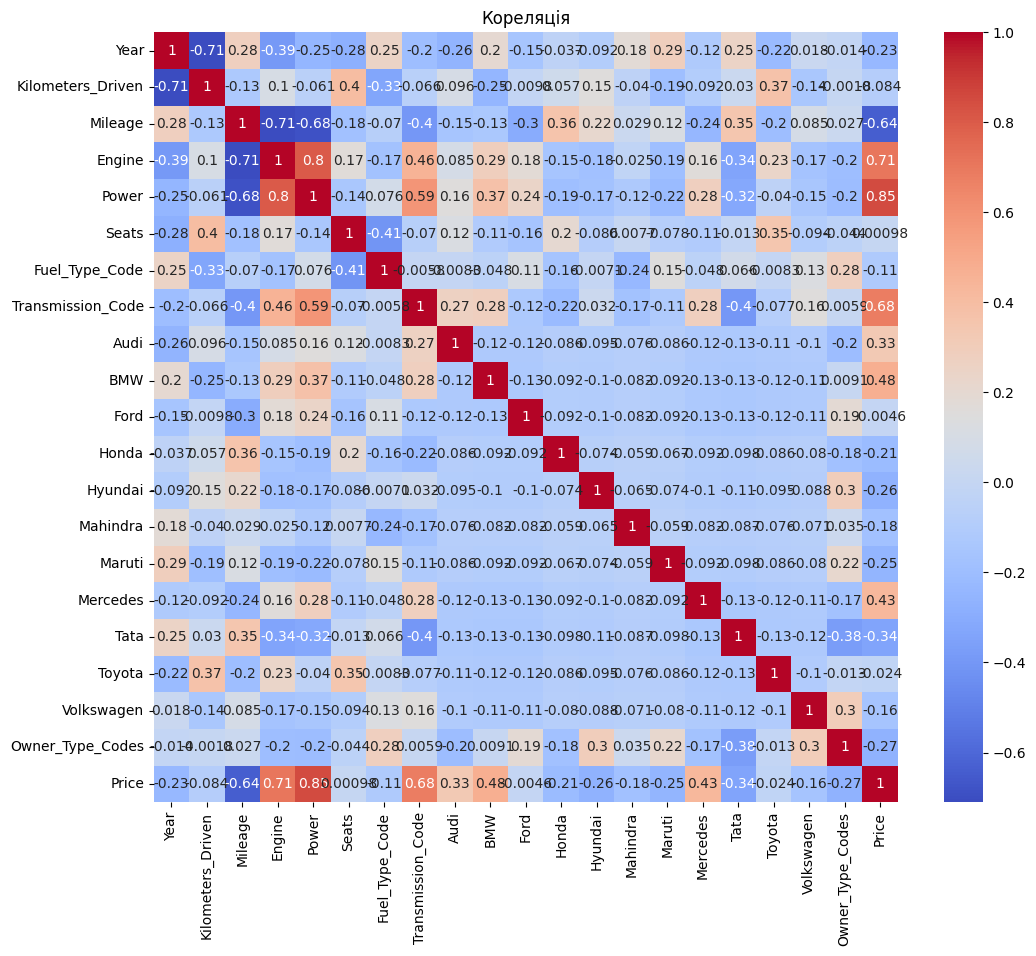

Price                1.000000
Power                0.849137
Engine               0.710561
Transmission_Code    0.680731
Mileage              0.638404
Name: Price, dtype: float64


In [16]:
drop_cols = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Car_ID']
X_train_num = X_train.drop(columns=drop_cols)
train_corr = pd.concat([X_train_num, y_train.reset_index(drop=True)], axis=1)

corr = train_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation")
plt.show()

print(corr['Price'].abs()[corr['Price'].abs() > 0.5].sort_values(ascending=False))

**The strongest correlation with price is car power, the more powerful the car, the more expensive it is. Engine capacity, transmission type, and fuel efficiency (mileage per liter) also show strong correlations with price.**

In [17]:
X_train_reg = X_train_num
X_test_reg = X_test.drop(columns=drop_cols)

model = LinearRegression()
model.fit(X_train_reg, y_train)

y_pred_train = model.predict(X_train_reg)
y_pred_test = model.predict(X_test_reg)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)

RMSE Train: 210342.8016204638
RMSE Test: 259601.26542723668


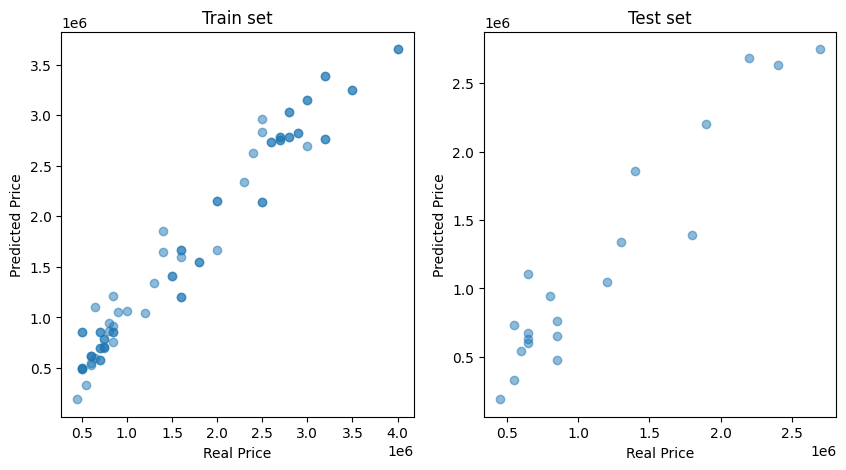

In [18]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.title("Train set")
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.title("Test set")
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")

plt.show()

- On the training set, the model demonstrates a fairly good fit, as most points lie close to the diagonal, indicating accurate predictions of the target variable during training.

- On the test set, there are fewer points overall, but a similar trend can be observed. However, some dispersion is present, especially for higher prices, which is likely due to the limited amount of data.

- In summary, the model shows reasonable performance given the relatively small dataset.

In [19]:
scaler = StandardScaler()
scaler.fit(X_train_reg)

X_train_scaled = scaler.transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

coef = pd.Series(model_scaled.coef_, index=X_train_reg.columns)
coef.sort_values(ascending=False)

Power                500000.506765
Mercedes             209257.737636
BMW                  208105.079738
Audi                 206123.092108
Transmission_Code    115153.439599
Owner_Type_Codes      43335.066079
Toyota                17619.429555
Seats                 -1744.048812
Year                 -11604.260975
Engine               -24683.084080
Honda                -63112.339850
Tata                 -65558.490423
Volkswagen           -93391.358093
Kilometers_Driven    -99713.958682
Maruti              -112786.673613
Ford                -119069.155830
Mileage             -131884.633123
Mahindra            -140931.632855
Hyundai             -151916.052473
Fuel_Type_Code      -185245.840763
dtype: float64

**Key Positive Influences on Car Price**

- Power: The most significant factor — the more powerful the car, the higher its price. This aligns well with expectations.

- Brand: Premium brands have a strong positive impact on price.

- Transmission type: Automatic transmission increases the price compared to manual.

**Key Negative Influences on Car Price**

- Fuel type: Certain fuel types (e.g., diesel) are associated with lower prices.

- Economy brands: Budget-segment brands reduce the price compared to premium ones.

- Fuel efficiency and kilometers driven: Higher mileage and lower fuel efficiency correlate with a lower price.

In [22]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num.columns, index=X_train_num.index)

y_train_aligned = y_train.reset_index(drop=True)

X_train_sm = sm.add_constant(X_train_scaled_df)
model_sm = sm.OLS(y_train_aligned, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           2.34e-34
Time:                        21:34:04   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.72e+0

In [23]:
p_values = model_sm.pvalues.drop('const')

significant_columns = p_values[p_values < 0.05].index.tolist()

print("Statistically significant features at the 0.05 significance level:")
print(significant_columns)

Статистично значущі ознаки при рівні значущості 0.05:
['Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Volkswagen']


In [24]:
X_train_significant = X_train_scaled_df[significant_columns]

X_train_significant_sm = sm.add_constant(X_train_significant)
model_significant = sm.OLS(y_train_aligned, X_train_significant_sm).fit()
print(model_significant.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           4.12e-39
Time:                        21:38:50   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+0

**After retaining only the statistically significant features, the values of R² and adjusted R² decreased only slightly. This means that the simplified model almost did not lose predictive quality, which indicates that many of the variables we excluded contributed little to explaining the variation in car prices.**

In [25]:
relaxed_columns = p_values[p_values < 0.25].index.tolist()

X_train_relaxed = X_train_scaled_df[relaxed_columns]

X_train_relaxed_sm = sm.add_constant(X_train_relaxed)
model_relaxed = sm.OLS(y_train_aligned, X_train_relaxed_sm).fit()
print(model_relaxed.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           4.85e-38
Time:                        21:43:26   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

**The R² value almost returned to that of the full model, and the adjusted R² even increased. Thus, by adding some additional features (which were not significant at p < 0.05 but were included at p < 0.25), the model maintains nearly the same predictive quality as the full model while using fewer predictors than initially. From a practical standpoint, the model with features at p < 0.25 provides a good compromise between simplicity and predictive performance.**